In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *


In [10]:
symbol = input("Enter the stock symbol: ")

In [19]:

def update_chart(selected_timeframe):
    # Connect to the SQLite database
    conn = sqlite3.connect('data/sp500_data.db')

    # Calculate the start date based on the selected timeframe
    if selected_timeframe == '1 Month':
        start_date = (pd.Timestamp.today() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
    elif selected_timeframe == '3 Months':
        start_date = (pd.Timestamp.today() - pd.DateOffset(months=3)).strftime('%Y-%m-%d')
    elif selected_timeframe == '6 Months':
        start_date = (pd.Timestamp.today() - pd.DateOffset(months=6)).strftime('%Y-%m-%d')
    elif selected_timeframe == '1 Year':
        start_date = (pd.Timestamp.today() - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
    elif selected_timeframe == '3 Years':
        start_date = (pd.Timestamp.today() - pd.DateOffset(years=3)).strftime('%Y-%m-%d')
    elif selected_timeframe == '5 Years':
        start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

    # Construct the SQL query for the stocks table
    sql_query_stockdata = f"SELECT * FROM stocks WHERE Symbol = ? AND Date >= ?"

    # Execute the query for the stocks table with user input
    cursor_stock = conn.cursor()
    cursor_stock.execute(sql_query_stockdata, (symbol, start_date))

    # Fetch all the rows from the StockData table
    rows_stock = cursor_stock.fetchall()

    # Create a DataFrame from the query results of the StockData table
    columns_stock = [description[0] for description in cursor_stock.description]
    df_stock = pd.DataFrame(rows_stock, columns=columns_stock)

    # Add a percent change column to the DataFrame for the StockData table
    df_stock['Percent_Change'] = df_stock['Adj Close'].pct_change() * 100

    # Drop any NaN values in the Percent_Change column for the StockData table
    df_stock.dropna(subset=['Percent_Change'], inplace=True)

    # Close the connection
    conn.close()

    # Create a line plot
    plt.plot(df_stock['Date'], df_stock['Percent_Change'])
    plt.xlabel('Date')
    plt.ylabel('Percent Change')
    plt.title(f'Line Plot of Percent Change for {symbol} ({selected_timeframe})')
    plt.xticks(rotation=45)
    plt.show()



In [20]:
# Create the Tkinter window
root = Tk()

In [21]:
# Create the dropdown menu
options = ['1 Month', '3 Months', '6 Months', '1 Year', '3 Years', '5 Years']
variable = StringVar(root)
variable.set(options[0]) # default value



In [22]:
# Define a callback function to update the chart when the dropdown menu is changed
def change_dropdown(*args):
    selected_timeframe = variable.get()
    update_chart(selected_timeframe)



In [23]:
# Create the dropdown menu
dropdown = OptionMenu(root, variable, *options)
dropdown.pack()



In [24]:
# Call the callback function when the dropdown menu is changed
variable.trace('w', change_dropdown)



'3056075116544change_dropdown'

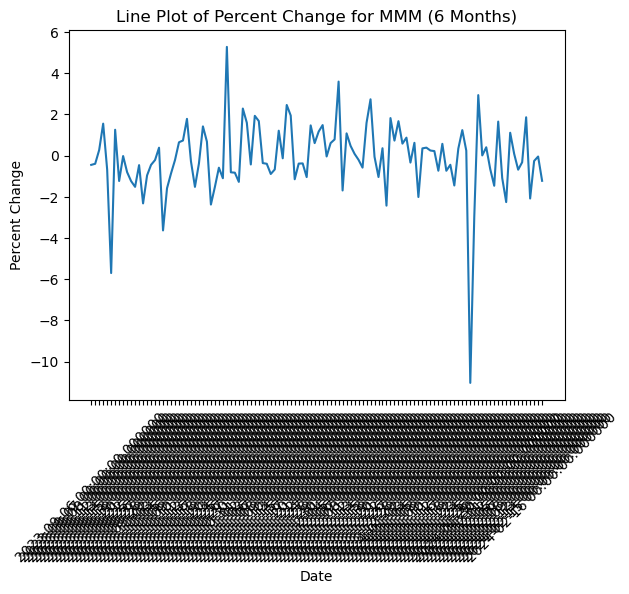

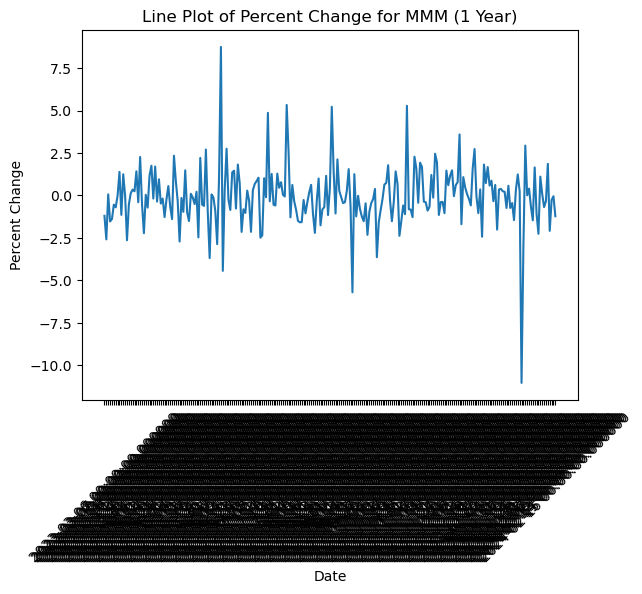

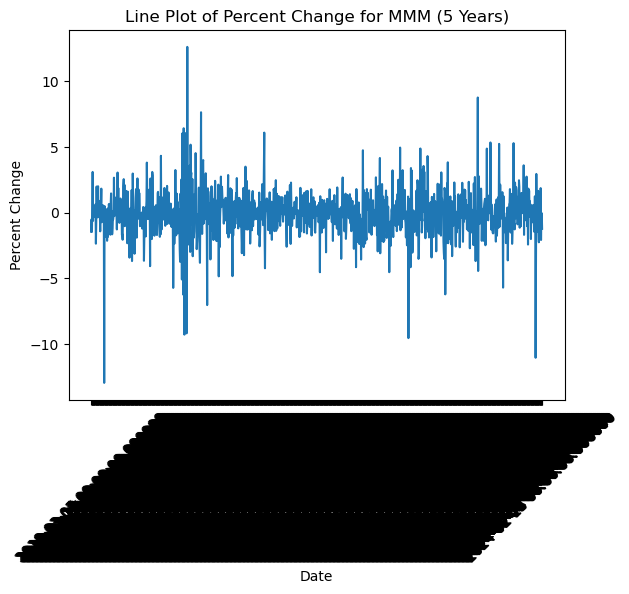

In [25]:
# Run the Tkinter event loop
root.mainloop()